<a href="https://colab.research.google.com/github/anumit2004/Custom-Linear-Regression-Models/blob/linear-regression/Use_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"This is simple uses case of Polynomial Regression algorithm."

# Polynomial Regression

**Polynomial Regression** is a type of linear regression where the relationship between the independent variable \( x \) and the dependent variable \( y \) is modeled as an \( n \)-degree polynomial.

Instead of fitting a straight line, it fits a curve to capture the non-linear relationship between variables.

## Model Equation

A polynomial regression model of degree \( n \) looks like:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n + \varepsilon
$$

Where:
- $\beta_0, \beta_1, \ldots, \beta_n $ are the model coefficients,
- $ \varepsilon $ is the error term.



This is used for making non linear distributions.

In [ ]:
import numpy as np

Mking a nonlinear data points .

In [ ]:
np.random.seed(42)
m=100;
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)

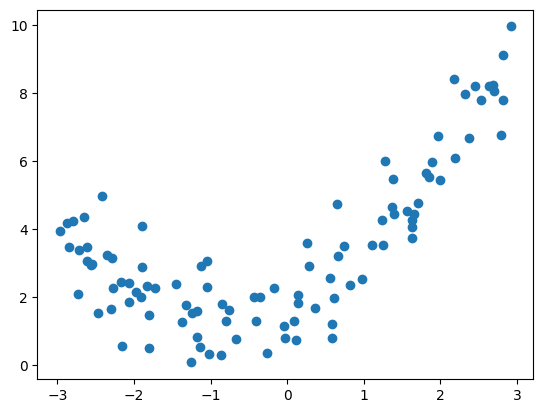

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

Cretaing features supporting the polynomials.

**POLYNOMIAL FEATURES:**
It has the parameters are

degree:(**defalut=2**) If a single int is given, it specifies the maximal degree of the polynomial features. If a tuple (min_degree, max_degree) is passed, then min_degree is the minimum and max_degree is the maximum polynomial degree of the generated features.

**interaction_only** = bool, default=False
If True, only interaction features are produced: features that are products of at most degree distinct input features, i.e. terms with power of 2 or higher of the same input feature are excluded:

**include_bias** = bool, default=True
If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).


an example is given here.




In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
print(X)
poly = PolynomialFeatures(2)
x_poly=poly.fit_transform(X)
print(x_poly)
poly = PolynomialFeatures(interaction_only=True)
x_poly2=poly.fit_transform(X)
print(x_poly2)

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


Above example is not related to our model , just an example .

Our model again started.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False) #making include_bias false 1 will be removed from the 1st column.
x_poly=poly.fit_transform(x)
print(x[0])
print(x_poly[0]) #now x_poly hold x along with x**2

[-0.75275929]
[-0.75275929  0.56664654]


This features containing polynomials are passed through Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_poly,y)
print('weight= ',linear_model.coef_)
print('bias =',linear_model.intercept_)
y_pred=linear_model.predict(x_poly)


weight=  [[0.93366893 0.56456263]]
bias = [1.78134581]


Ploting the data into the graph

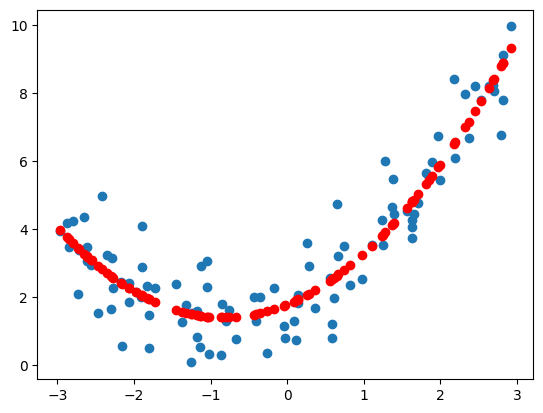

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.scatter(x,y_pred,color='red')
plt.show()

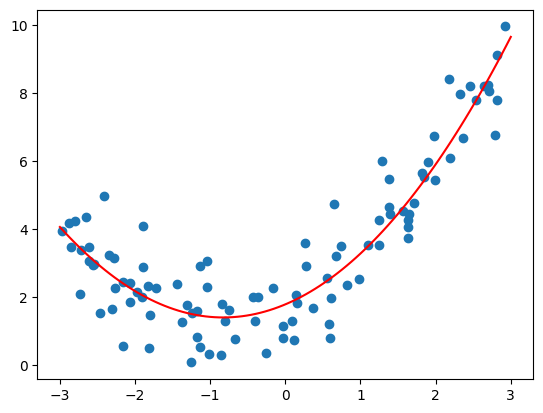

In [ ]:
x_plot=np.linspace(-3,3,100).reshape(-1,1)
x_plot_poly=poly.transform(x_plot)
y_plot=linear_model.predict(x_plot_poly)
plt.scatter(x,y)
plt.plot(x_plot,y_plot,color='red')
plt.show()

In [ ]:
print(x_plot.shape)
print(x_plot_poly.shape)
print(y_plot.shape)

(100, 1)
(100, 2)
(100, 1)
